<a href="https://colab.research.google.com/github/dovalless/mi-primer-red-neuronal/blob/main/Mi_primerared_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/bin/bash: line 1: nvidia-smi: command not found
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)


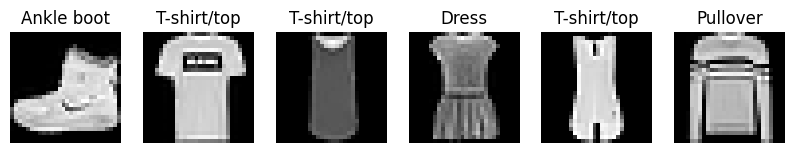

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 - 5s - 12ms/step - accuracy: 0.7844 - loss: 0.6240 - val_accuracy: 0.8432 - val_loss: 0.4451
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.8469 - loss: 0.4357 - val_accuracy: 0.8593 - val_loss: 0.3879
Epoch 3/10
422/422 - 2s - 5ms/step - accuracy: 0.8614 - loss: 0.3875 - val_accuracy: 0.8612 - val_loss: 0.3788
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.8699 - loss: 0.3621 - val_accuracy: 0.8733 - val_loss: 0.3525
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.8779 - loss: 0.3420 - val_accuracy: 0.8768 - val_loss: 0.3474
Epoch 6/10
422/422 - 2s - 6ms/step - accuracy: 0.8787 - loss: 0.3325 - val_accuracy: 0.8735 - val_loss: 0.3570
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.8839 - loss: 0.3193 - val_accuracy: 0.8798 - val_loss: 0.3263
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.8875 - loss: 0.3076 - val_accuracy: 0.8685 - val_loss: 0.3489
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.8913 - loss: 0.2972 - val_accuracy: 0.8873 - val_loss: 0.3091


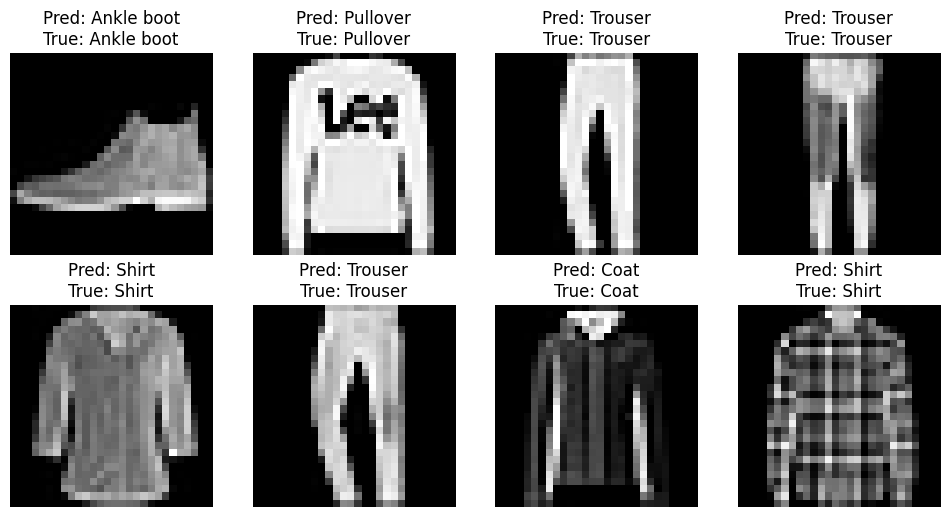

Modelo guardado como fashion_mnist_dense_model.h5


In [1]:
# 1) Instalaciones/chequeos (Colab ya trae todo; esta celda es segura)
!nvidia-smi -L || true   # muestra GPU disponible (opcional)

# 2) Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 3) Cargar el dataset Fashion MNIST (imágenes 28x28 en escala de grises)
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 4) Ver dimensiones y un ejemplo rápido
print("x_train shape:", x_train.shape)   # (60000, 28, 28)
print("y_train shape:", y_train.shape)   # (60000,)
print("x_test shape:", x_test.shape)     # (10000, 28, 28)

# mostrar 6 imágenes de ejemplo con su etiqueta
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

# 5) Preprocesamiento: normalizar (0-1) y expandir dimensiones si fuera necesario
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# 6) Crear la red neuronal (modelo simple - red totalmente conectada)
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),      # transforma 28x28 -> 784 vectores
    layers.Dense(128, activation='relu'),     # capa oculta con 128 neuronas
    layers.Dropout(0.2),                      # evita sobreajuste (apaga 20% en entrenamiento)
    layers.Dense(10, activation='softmax')    # capa de salida: 10 clases -> probabilidad
])

# 7) Compilar el modelo: optimizador, función de pérdida y métricas
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 8) Resumen del modelo (arquitectura)
model.summary()

# 9) Entrenar (fit)
history = model.fit(x_train, y_train,
                    epochs=10,            # puedes aumentar a 20 si quieres más precisión
                    batch_size=128,
                    validation_split=0.1, # usa 10% de train para validar
                    verbose=2)

# 10) Evaluar con el set de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# 11) Hacer predicciones en el set de prueba y mostrar ejemplos con predicción
pred_probs = model.predict(x_test)   # probabilidades por clase
pred_labels = np.argmax(pred_probs, axis=1)

# mostrar 8 ejemplos con predicción y etiqueta real
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
plt.show()

# 12) Guardar el modelo (opcional)
model.save('fashion_mnist_dense_model.h5')
print("Modelo guardado como fashion_mnist_dense_model.h5")

In [2]:
from IPython.display import IFrame

# Abre una versión embebida del Playground en Colab
IFrame('https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&networkShape=3,2&seed=0&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&colormap=Paired&problem=classification&initZero=false', width=1100, height=700)